The workflow of the programme depends on what input is available.

![image](Workflow/Slide1.png)
![image](Workflow/Slide2.png)
![image](Workflow/Slide3.png)

In the following example, the full 4-step workflow will be illustrated.

# Case 1:

Diversifying accross 4 asset classes:

1. Global equities
2. Inflation-protected securities
3. Commodities
4. Government bonds


In this simple example, the following 4 ETFs will be selected as proxies:

1. iShares MSCI ACWI ETF ([**ACWI**](https://www.ishares.com/us/products/239600/ishares-msci-acwi-etf) -> Global equities
2. iShares TIPS Bond ETF [(**TIP**)](https://www.ishares.com/us/products/239467/ishares-tips-bond-etf) -> Inflation-protected securities
3. iShares S&P GSCI Commodity-Indexed Trust [(**GSG**)](https://www.ishares.com/us/products/239757/ishares-sp-gsci-commodityindexed-trust-fund) -> Commodities
4. iShares Intermediate Govt/Crdt Bd ETF [(**GVI**)](https://www.ishares.com/us/products/239464/ishares-intermediate-governmentcredit-bond-etf) -> Government bonds

## Step 1. Data importing
Run setup file to get the necessary libraries.

In [1]:
%run -i setup

Import api_key from your secret file, and import the Risk Parity programmes from AssetAllocation python file.

In [2]:
from secret import api_key as api_key
from RiskParity import RiskParity, NonConvexRiskParity, DataPreprocessor, GetRapidAPIData

Specify the assets to get data online.

In [3]:
assets = ['ACWI', 'TIP', 'GSG', 'GVI']

Initiate an instance of the api_data class and run the prep_data() method.

In [4]:
data = GetRapidAPIData(api_key, assets, '2010.08.30', '2020.11.30', '1mo')
outcome_df = data.prep_data()

Getting data for ACWI ...
Getting data for TIP ...
Getting data for GSG ...
Getting data for GVI ...
Pulling together a consolidated DataFrame ...
Relevant data has been downloaded successfully.


In [5]:
outcome_df

,Date,ACWI,TIP,GSG,GVI
122,2010-09-01,34.383957,89.716446,30.010000,89.709450
121,2010-10-01,35.673061,91.847870,30.879999,89.889923
120,2010-11-01,34.893219,90.198616,31.260000,89.252754
119,2010-12-01,37.248615,88.786621,34.099998,88.090508
118,2011-01-01,38.013916,89.167252,35.160000,88.751053
...,...,...,...,...,...
4,2020-07-01,77.072403,124.972298,10.750000,117.131371
3,2020-08-01,81.716400,126.084412,11.250000,116.964706
2,2020-09-01,79.305092,125.607788,10.750000,116.921486
1,2020-10-01,77.538788,124.346756,10.380000,116.614868


In [6]:
import os
display(outcome_df)
cwd = os.getcwd()
outcome_df.to_excel(f'{cwd}//4_assets_Case_1.xlsx', index=False)

,Date,ACWI,TIP,GSG,GVI
122,2010-09-01,34.383957,89.716446,30.010000,89.709450
121,2010-10-01,35.673061,91.847870,30.879999,89.889923
120,2010-11-01,34.893219,90.198616,31.260000,89.252754
119,2010-12-01,37.248615,88.786621,34.099998,88.090508
118,2011-01-01,38.013916,89.167252,35.160000,88.751053
...,...,...,...,...,...
4,2020-07-01,77.072403,124.972298,10.750000,117.131371
3,2020-08-01,81.716400,126.084412,11.250000,116.964706
2,2020-09-01,79.305092,125.607788,10.750000,116.921486
1,2020-10-01,77.538788,124.346756,10.380000,116.614868


## Step 2. Preprocessing data
Initiate an instance of the preprocessor PrepDataRP() and turn the data into a return covariance matrix

In [7]:
preprocessing = DataPreprocessor()
cov_mat = preprocessing.transform(outcome_df)
assets = preprocessing.assets_

Transforming data into usable format (Covariance Matrix)
Data transformation complete.


## Step 3. Optimization
Run the preprocessed data through the core optimization class.

In [8]:
test_rpp = RiskParity(cov_mat, assets)
test_rpp.optimize()

Minimised convex risk function value: -2.3298
  Assets  Allocation
0   ACWI      0.0878
1    TIP      0.2567
2    GSG      0.0684
3    GVI      0.5870


C:\Users\ZH834BT\OneDrive - EY\Documents\GitHub\Risk-Parity\RiskParity.py:59: RuntimeWarning: invalid value encountered in log
  risk_func = 0.5*x_T.dot(self.cov_mat).dot(x) - b_T*(np.sum(np.log(x)))


## Step 4. Output

Display and visualise risk statistics; Output an Excel file

Marginal risk contribution of assets:
 [0.02910439696723612, 0.009983822866910843, 0.03740115290270145, 0.004361937197530657]
Risk contribution of assets:
 [0.002554569384264542, 0.0025631745511922924, 0.002560034209772999, 0.0025606603798990013]
Relative risk contribution of assets:
 [0.24950771330947621, 0.25034818980465956, 0.25004146906676716, 0.250102627819097]


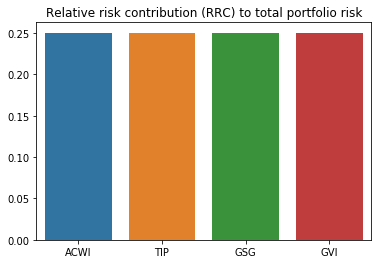

In [9]:
# Calculate and display relevant risk statistics
test_rpp.cal_risk_stats()
print(f'Marginal risk contribution of assets:\n {test_rpp.MRC_}')
print(f'Risk contribution of assets:\n {test_rpp.RC_}')
print(f'Relative risk contribution of assets:\n {test_rpp.RRC_}')

# Visualise risk statistics with graph
test_rpp.visualise_risk_stats()

# Output the allocation into an Excel file
test_rpp.out_excel()

## Extra: generating a summary Excel file

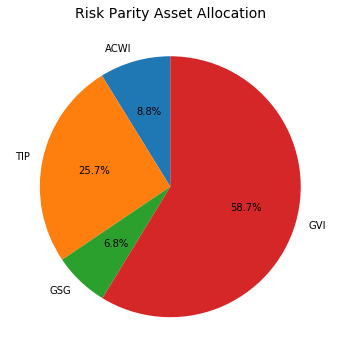

In [10]:
# Using Matplotlib
pie, ax = plt.subplots(figsize=[6,6])
labels = assets
plt.pie(x=test_rpp.allocation_, autopct="%.1f%%", labels=labels, startangle=90)
plt.title("Risk Parity Asset Allocation", fontsize=14)
pie.savefig('Allocation_pie.png')

In [18]:
# Risk Statistics visualisations
MRC_fig = test_rpp.MRC_fig_
MRC_fig.figure.savefig('MRC_fig.png')
RC_fig = test_rpp.RC_fig_
RC_fig.figure.savefig('RC_fig.png')
RRC_fig = test_rpp.RRC_fig_
RRC_fig.figure.savefig('RRC_fig.png')

In [19]:
# Generate summary Excel file
writer = pd.ExcelWriter('RiskParity_summary.xlsx', engine='xlsxwriter')
test_rpp.allocation_df_.to_excel(writer, sheet_name='Allocation', index=False)
worksheet_allocation = writer.sheets['Allocation']
worksheet_allocation.insert_image('D1', 'Allocation_pie.png')
risk_stats_df = pd.DataFrame({'Assets': assets, 
                        'Marginal Risk Contribution': test_rpp.MRC_,
                        'Risk Contribution': test_rpp.RC_,
                        'Relative Risk Contribution': test_rpp.RRC_})
risk_stats_df.to_excel(writer, sheet_name='Risk Stats', index=False)
worksheet_riskstats = writer.sheets['Risk Stats']
worksheet_riskstats.insert_image('F1', 'MRC_fig.png')
worksheet_riskstats.insert_image('F25', 'RC_fig.png')
worksheet_riskstats.insert_image('F49', 'RRC_fig.png')
outcome_df.to_excel(writer, sheet_name='Data', index=False)
writer.save()

## Comments
As can be seen from the asset allocation DataFrame:
The following allocation results in a Risk Parity portfolio of these 4 assets:

1. **ACWI**: 9%
2. **TIP**: 26%
3. **GSG**: 7%
4. **GVI**: 58%

# Case 2: What does the Risk Profile of a 60/40 Portfolio look like?


In this section, let's have a portfolio of 2 asset classes: Equity and Fixed Income. A 60/40 portfolio usually has 60% allocation in Equity and 40% allocation in Bond.

1. Equity proxy: SPDR S&P 500 ETF [(**SPY**)](https://uk.finance.yahoo.com/quote/SPY?p=SPY&.tsrc=fin-srch)

2. Fixed Income proxy: iShares Intermediate Govt/Crdt Bd ETF [(**GVI**)](https://www.ishares.com/us/products/239464/ishares-intermediate-governmentcredit-bond-etf) 


In [12]:
# Importing data
assets_2 = ['ACWI', 'GVI']
data_2 = GetRapidAPIData(api_key, assets_2, '1990.08.30', '2020.11.30', '1mo')
outcome_df_2 = data_2.prep_data()

Getting data for ACWI ...
Getting data for GVI ...
Pulling together a consolidated DataFrame ...
Relevant data has been downloaded successfully.


In [13]:
# Get the return covariance matrix
cov_mat_2 = preprocessing.transform(outcome_df_2)
print(cov_mat_2)

Transforming data into usable format (Covariance Matrix)
Data transformation complete.
[[2.65484400e-03 6.39003056e-05]
 [6.39003056e-05 8.72682655e-05]]


In [14]:
# Initiating the class to start the risk stats calculation process
Portfolio_6040 = RiskParity(cov_mat_2, assets_2) 

In [15]:
# Loading the allocation into the class
# Manually inserting 60/40 allocation into the class
import numpy as np
Portfolio_6040.allocation_ = np.array([0.6, 0.4])
Portfolio_6040.cal_risk_stats()
print(test_rpp.RRC_, assets)

[0.24950771330947621, 0.25034818980465956, 0.25004146906676716, 0.250102627819097] ['ACWI', 'TIP', 'GSG', 'GVI']


<Figure size 432x648 with 0 Axes>

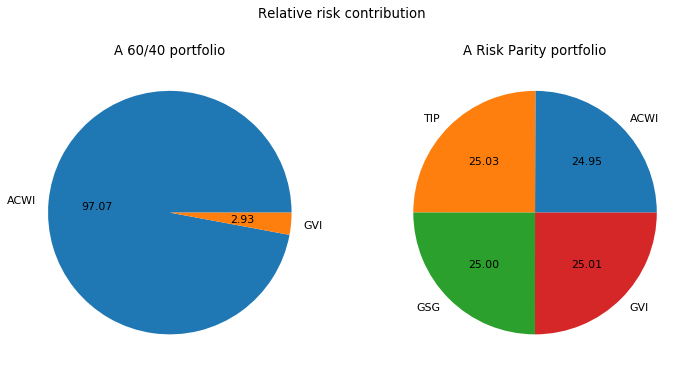

60/40 allocation:
  [('ACWI', 0.6), ('GVI', 0.4)]
Risk Parity allocation:
  [('ACWI', 0.0878), ('TIP', 0.2567), ('GSG', 0.0684), ('GVI', 0.587)]


In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Visual params
mpl.rcParams['font.size'] = 11
plt.figure(figsize=(6,9))

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))

# Visualisation
fig.suptitle('Relative risk contribution')
ax1.pie(Portfolio_6040.RRC_, labels=assets_2, autopct='%.2f')
ax1.set_title('A 60/40 portfolio')
ax2.pie(test_rpp.RRC_, labels=assets, autopct='%.2f')
ax2.set_title('A Risk Parity portfolio')
plt.show()

# Printing allocation
print('60/40 allocation:\n ', list(zip(assets_2, Portfolio_6040.allocation_)))
print('Risk Parity allocation:\n ', list(zip(assets, [round(w, 4) for w in test_rpp.allocation_])))

A 60/40 portfolio like one above does not have real diversification. While only 60% of the capital is invested in ACWI, 97.05% of the portfolio's risk is driven by the asset. In the Risk Parity portfolio of 4 assets, only 9.07% of the capital is invested in ACWI, but it accounts for about 25% of the portfolio's risk.